<a href="https://colab.research.google.com/github/MohitBhimrajka/Model/blob/main/Exponential_Model_for_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

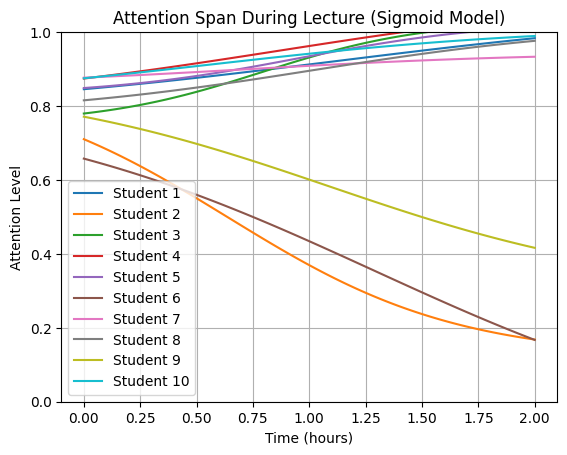

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t, L, k, t_0, C):
    return L / (1 + np.exp(-k * (t - t_0))) + C

def generate_individual_parameters(num_students, decreasing_students, increasing_students, seed=42):
    np.random.seed(seed)  # Set seed for reproducibility

    # Generate random parameters for each student
    # You can adjust the range of variability based on your observations or data
    L_values = np.random.uniform(0.85, 0.95, num_students)  # Maximum attention level
    k_values = np.random.uniform(1, 2, num_students)        # Logistic growth rate parameter
    t_0_values = np.random.uniform(0.5, 1.5, num_students)  # Time at which attention is halfway between C and L
    C_values = np.random.uniform(0.5, 0.7, num_students)    # Initial attention level

    # Modify parameters for decreasing students
    for student in decreasing_students:
        k_values[student] *= -1  # Reverse the growth rate to model a decrease

    # Modify parameters for increasing students
    for student in increasing_students:
        k_values[student] *= np.random.uniform(1, 2)  # Vary the growth rate for increasing attention spans

    return L_values, k_values, t_0_values, C_values

def simulate_lecture(num_students, num_decreasing_students, num_increasing_students, lecture_duration, seed=42):
    np.random.seed(seed)  # Set seed for reproducibility

    # Randomly select some students whose attention span is decreasing
    decreasing_students = np.random.choice(num_students, num_decreasing_students, replace=False)
    # Randomly select some students whose attention span is increasing
    increasing_students = np.random.choice([i for i in range(num_students) if i not in decreasing_students], num_increasing_students, replace=False)

    # Generate individual parameters for each student
    L_values, k_values, t_0_values, C_values = generate_individual_parameters(num_students, decreasing_students, increasing_students, seed)

    # Calculate attention for each student
    time_intervals = np.linspace(0, lecture_duration, 100)
    for i in range(num_students):
        attention_increase = sigmoid(time_intervals, L_values[i], k_values[i], t_0_values[i], C_values[i])
        if i in decreasing_students:
            attention_decrease = sigmoid(time_intervals, L_values[i], -k_values[i], t_0_values[i], C_values[i])
            attention_levels = attention_increase - attention_decrease  # Model decreasing attention
            start_attention = np.random.uniform(0.3, 0.6)  # Keep starting attention within 0.3 to 0.6
        elif i in increasing_students:
            attention_levels = attention_increase
            start_attention = np.random.uniform(0.5, 0.8)  # Keep starting attention within 0.5 to 0.8
        else:
            attention_levels = attention_increase
            start_attention = np.random.uniform(0.4, 0.7)  # Keep starting attention within 0.4 to 0.7

        # Adjusting ending attention levels
        end_attention = 0.9    # Specify the ending attention level
        attention_levels = start_attention + (end_attention - start_attention) * attention_levels

        plt.plot(time_intervals, attention_levels, label=f'Student {i+1}')

    plt.title('Attention Span During Lecture (Sigmoid Model)')
    plt.xlabel('Time (hours)')
    plt.ylabel('Attention Level')
    plt.ylim(0, 1)  # Set y-axis limits to ensure attention levels are between 0 and 1
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulate lecture for 10 students (3 with decreasing attention, 4 with increasing attention) over a 2-hour lecture
simulate_lecture(10, 3, 4, 2)
